# Logistic Regression From Scratch

Epoch 0: Loss = 0.7742
Epoch 100: Loss = 0.7185
Epoch 200: Loss = 0.6697
Epoch 300: Loss = 0.6252
Epoch 400: Loss = 0.5849
Epoch 500: Loss = 0.5485
Epoch 600: Loss = 0.5159
Epoch 700: Loss = 0.4866
Epoch 800: Loss = 0.4604
Epoch 900: Loss = 0.4369

Learned m: 0.3729749489719582
Learned c: -0.3779782926113617
Accuracy: 0.74


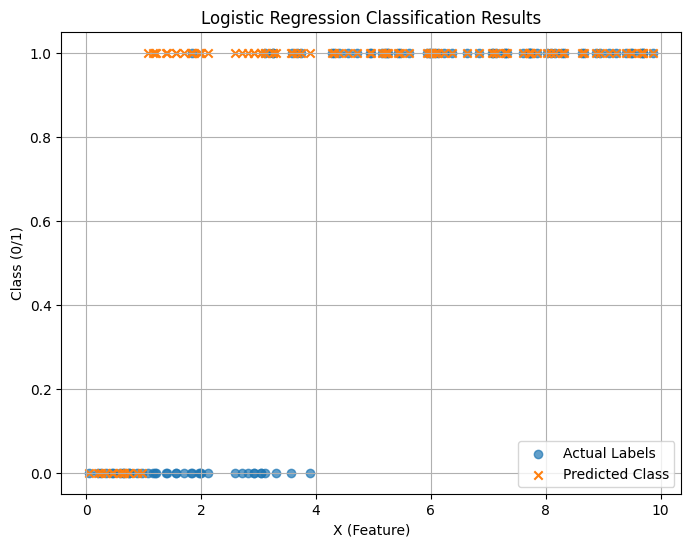

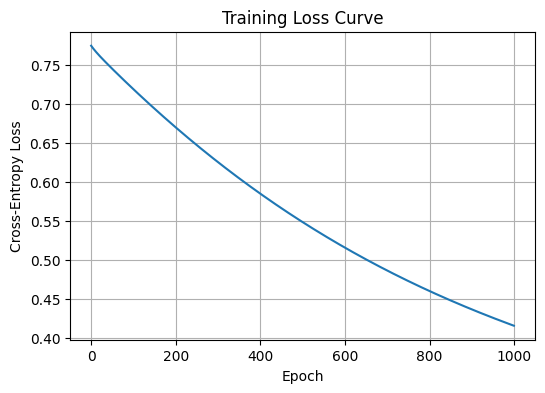

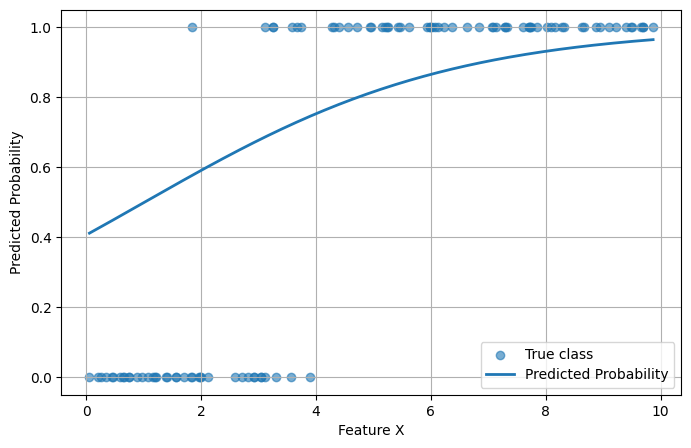

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Sample Data
np.random.seed(42)

X = np.random.rand(100, 1) * 10

# True labels (0 or 1) based on a noisy linear threshold
true_m = 1.2
true_c = -4
noise = np.random.randn(100, 1)
linear_combination = true_m * X + true_c + noise
y = (linear_combination > 0).astype(int) # 0 or 1 labels

# 2. Initialize Parameters
m = np.random.randn()
c = np.random.randn()
lr = 0.01
epochs = 1000
losses = [] # store loss value

# 3. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Loss Function (Cross Entropy)
def cross_entrophy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1-1e-10) # prevent log(0)
    return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

# 5. Training Loop
for epoch in range(epochs):
    z = m * X + c
    y_pred = sigmoid(z)

    # Calculate loss
    loss = cross_entropy_loss(y, y_pred)
    losses.append(loss)

    # Gradients
    dm = np.mean((y_pred - y) * X)
    dc = np.mean(y_pred - y)

    # Update parameters
    m -= lr * dm
    c -= lr * dc

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# 6. Final Parameters
print("\nLearned m:", m)
print("Learned c:", c)

# 7. Final Predictions & Accuracy
y_prob = sigmoid(m * X + c)
y_pred_class = (y_prob >= 0.5).astype(int)
accuracy = (y_pred_class == y).mean()
print("Accuracy:", accuracy)

# Visualization
# 1. Class vs Prediction
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Labels', alpha=0.7)
plt.scatter(X, y_pred_class, label='Predicted Class', marker='x')
plt.xlabel("X (Feature)")
plt.ylabel("Class (0/1)")
plt.title("Logistic Regression Classification Results")
plt.legend()
plt.grid(True)
plt.show()

# 2. Loss Curve
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# 3. Probability Curve
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='True class', alpha=0.6)
xs = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
plt.plot(xs, sigmoid(m*xs + c), label='Predicted Probability', linewidth=2)
plt.xlabel("Feature X")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()